<a href="https://colab.research.google.com/github/araldi/HS22_Big-Data-analysis-in-Biomedical-Research/blob/main/Week_09/15_Classification_part2_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict breast cancer malignancy with supervised learning classification methods

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_url = 'https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/Week6/Logistic_regression_data.csv'

breast = pd.read_csv(dataset_url)

In [ ]:
breast.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Exploratory data analysis

In [ ]:
feature_columns = breast.select_dtypes(exclude = ['int64','object']).columns
features = [i for i in feature_columns if 'Unnamed: 32' not in i]
features = [i.replace(' ', '_') for i in features]

breast.rename(columns = dict(zip(feature_columns, features)), inplace=True)

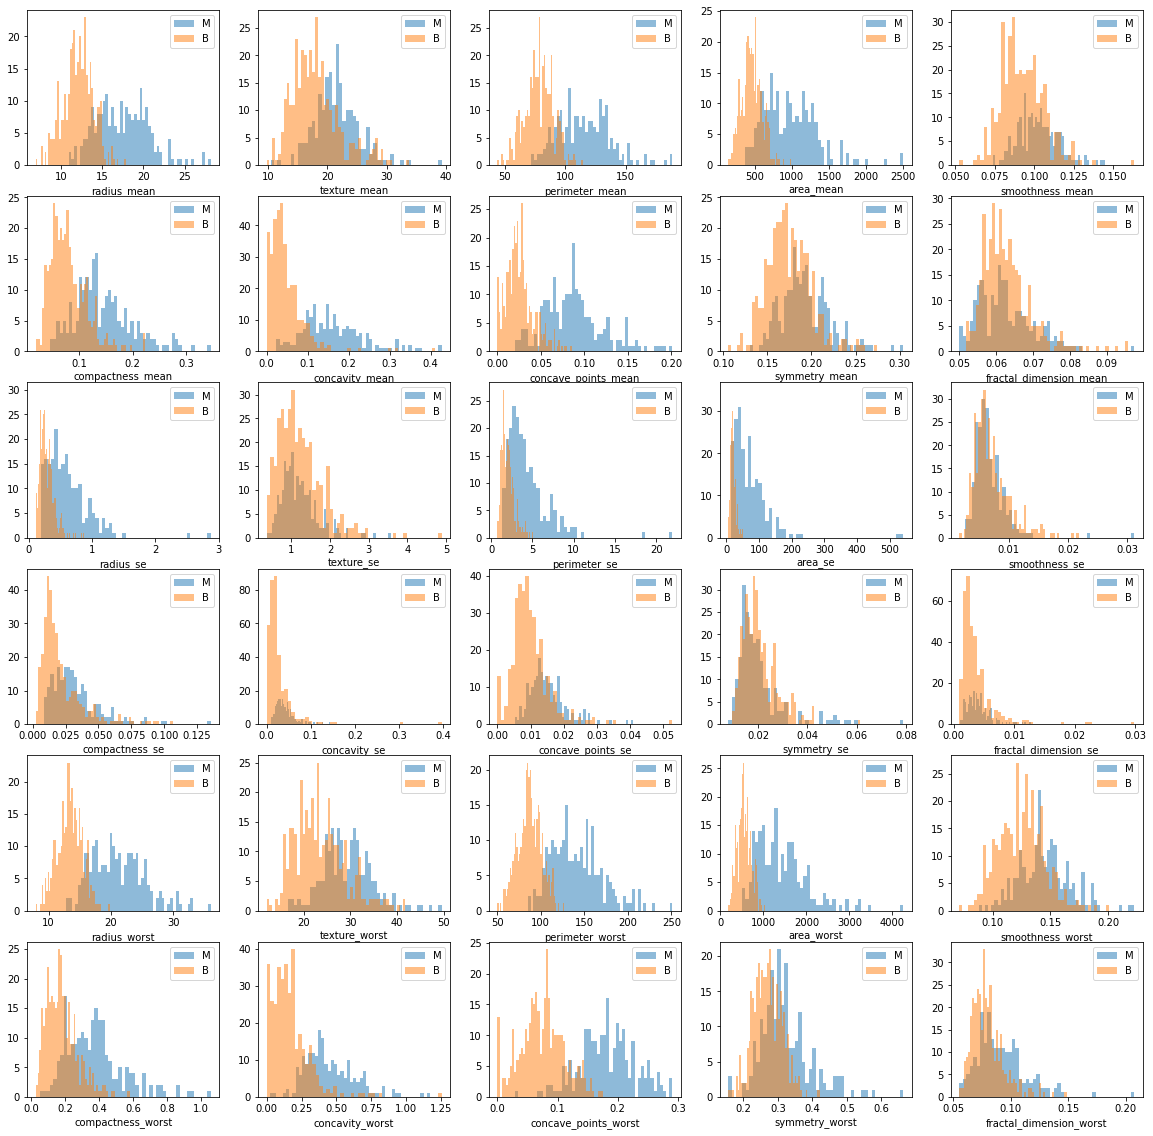

In [ ]:
# in-depth exploration of the features
plt.figure(figsize = (20,20))
i=1
m = breast['diagnosis'] == 'M'
b = breast['diagnosis'] == 'B'
for feature in features:

  plt.subplot(6,5, i)
  plt.hist(x=feature, data = breast[m], label = 'M', bins = 50, alpha = 0.5)
  plt.hist(x=feature, data = breast[b], label = 'B', bins = 50, alpha = 0.5)
  i = i+1
  plt.xlabel(feature)
  plt.legend()
plt.show()
plt.close()

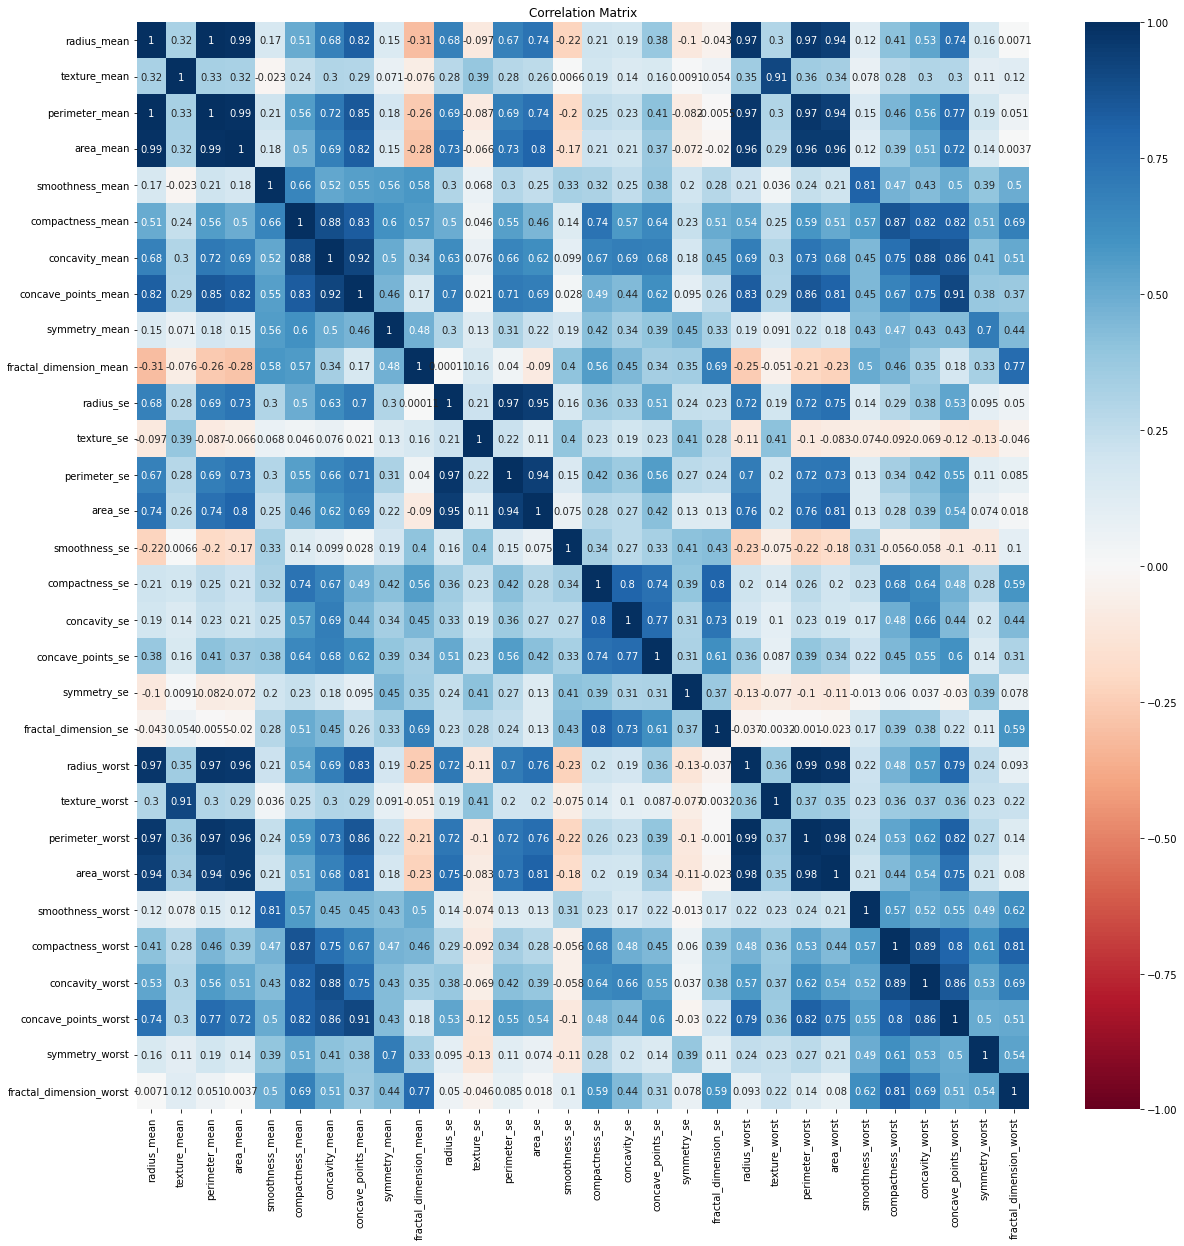

In [ ]:
# test the correlation among features
plt.figure(figsize=(20,20))
sns.heatmap(breast[features].corr(),annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix');

# !!!!!
# high correlation between radius, perimeter, area --> keep just one of these features! 

## Exercise

* Prepare the dataset for machine learning (convert features in binary/continuos, split in train/test set - 25% test)
* Classify malignant or benign breast tumors with Random Forest and Gradient Boosted trees.

* Test different parameters (for Random Forest: criterion, depth, estimators, etc - for Gradient Boosted: loss,  depth, estimators, etc) to determine the best model.

* Determine feature importance
* Predict "malignant" or "benign" in the 25% split test set with the best fitting model.
* Create a confusion matrix for the predictions.


#### Prepare the dataset for CART

*   It is a good idea for CART to remove highly correlated features. Let's start with removing all perimeters and areas (which highly correlate with radius).
*   Split train-test datasets

In [ ]:
# remove highly correlated features

ml_features = [i for i in features if "perimeter" not in i]
ml_features = [i for i in ml_features if "area" not in i]

breast_ml = breast[['diagnosis'] + ml_features]

In [ ]:
breast_ml

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.03003,0.006193,25.380,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.01389,0.003532,24.990,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.02250,0.004571,23.570,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.05963,0.009208,14.910,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.01756,0.005115,22.540,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.01114,0.004239,25.450,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.01898,0.002498,23.690,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.01318,0.003892,18.980,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.02324,0.006185,25.740,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# split train-test datasets

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(breast_ml, test_size=0.25, random_state=2022)

# it does not need scaling!!!

#### Train Random forest models

Create different models to test different criteria.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#model 1
rf1 =  RandomForestClassifier(max_depth=3, criterion="gini", n_estimators = 1000, 
                                       random_state=2022).fit(train_df[ml_features].values, 
                                                             train_df["diagnosis"])
print ("score %.2f"%rf1.score(train_df[ml_features].values, train_df["diagnosis"]))

score 0.98


In [ ]:
#model 2

rf2 =  RandomForestClassifier(max_depth=None, criterion="gini", n_estimators = 1000,
                                       random_state=2022).fit(train_df[ml_features].values, 
                                                             train_df["diagnosis"])
print ("score %.2f"%rf2.score(train_df[ml_features].values, train_df["diagnosis"]))

score 1.00


#### Determine feature importance in the Random forest models

Random Forest feature importance
radius_mean 0.11 +/- 0.21
texture_mean 0.02 +/- 0.05
smoothness_mean 0.01 +/- 0.02
compactness_mean 0.03 +/- 0.1
concavity_mean 0.09 +/- 0.21
concave_points_mean 0.14 +/- 0.27
symmetry_mean 0.0 +/- 0.01
fractal_dimension_mean 0.0 +/- 0.01
radius_se 0.06 +/- 0.14
texture_se 0.0 +/- 0.01
smoothness_se 0.0 +/- 0.01
compactness_se 0.0 +/- 0.03
concavity_se 0.01 +/- 0.05
concave_points_se 0.01 +/- 0.06
symmetry_se 0.0 +/- 0.01
fractal_dimension_se 0.0 +/- 0.01
radius_worst 0.18 +/- 0.28
texture_worst 0.02 +/- 0.06
smoothness_worst 0.01 +/- 0.03
compactness_worst 0.02 +/- 0.08
concavity_worst 0.08 +/- 0.19
concave_points_worst 0.18 +/- 0.29
symmetry_worst 0.01 +/- 0.03
fractal_dimension_worst 0.01 +/- 0.02


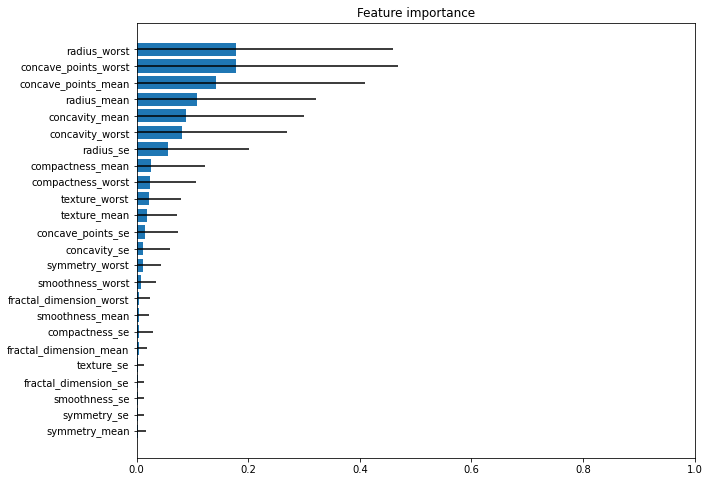

In [ ]:
# Compare feature importance in the models above
 # use model.feature_importances_ to determine the importance of each feature
 # also create a plot with the variance of the feature importance in each of the estimators

# Model 1
fistd = np.std([tree.feature_importances_ for tree in rf1.estimators_],
             axis=0)
print("Random Forest feature importance")
for f, fi, s in zip (train_df[ml_features].columns, rf1.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))


indices = np.argsort(rf1.feature_importances_)
plt.figure(figsize= (10,8))
plt.title("Feature importance")
plt.barh(np.arange(rf1.feature_importances_.shape[0]), 
        rf1.feature_importances_[indices],
       xerr=fistd[indices], align="center")
plt.yticks(range(rf1.feature_importances_.shape[0]), 
          labels=train_df[ml_features].columns[indices])
plt.xlim(0, 1)
plt.show()

Random Forest feature importance
radius_mean 0.11 +/- 0.19
texture_mean 0.02 +/- 0.05
smoothness_mean 0.01 +/- 0.02
compactness_mean 0.02 +/- 0.08
concavity_mean 0.08 +/- 0.18
concave_points_mean 0.13 +/- 0.23
symmetry_mean 0.01 +/- 0.01
fractal_dimension_mean 0.01 +/- 0.02
radius_se 0.05 +/- 0.12
texture_se 0.01 +/- 0.01
smoothness_se 0.01 +/- 0.01
compactness_se 0.01 +/- 0.02
concavity_se 0.01 +/- 0.04
concave_points_se 0.01 +/- 0.05
symmetry_se 0.01 +/- 0.01
fractal_dimension_se 0.01 +/- 0.01
radius_worst 0.17 +/- 0.25
texture_worst 0.03 +/- 0.05
smoothness_worst 0.01 +/- 0.03
compactness_worst 0.02 +/- 0.07
concavity_worst 0.07 +/- 0.15
concave_points_worst 0.16 +/- 0.25
symmetry_worst 0.01 +/- 0.03
fractal_dimension_worst 0.01 +/- 0.02


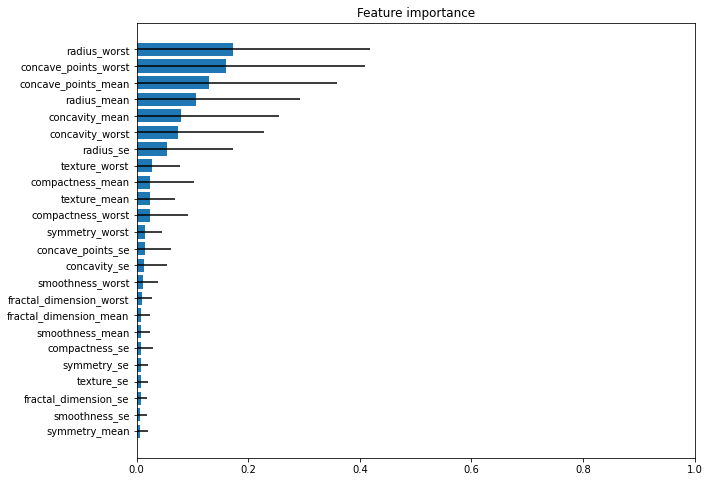

In [ ]:
fistd = np.std([tree.feature_importances_ for tree in rf2.estimators_],
             axis=0)
print("Random Forest feature importance")
for f, fi, s in zip (train_df[ml_features].columns, rf2.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))


indices = np.argsort(rf2.feature_importances_)
plt.figure(figsize= (10,8))
plt.title("Feature importance")
plt.barh(np.arange(rf2.feature_importances_.shape[0]), 
        rf2.feature_importances_[indices],
       xerr=fistd[indices], align="center")
plt.yticks(range(rf2.feature_importances_.shape[0]), 
          labels=train_df[ml_features].columns[indices])
plt.xlim(0, 1)
plt.show()

#### Predict malignant and benign tumors with the trained models above in the test dataset




In [ ]:
from sklearn import metrics


predicted_classification_model1 = rf1.predict(test_df[ml_features].values)

predicted_classification_model2 = rf2.predict(test_df[ml_features].values)

NameError: ignored

In [ ]:
def getresults(test,pred_variable):
  precision = metrics.precision_score(test,pred_variable,  pos_label="M", average="binary")
  recall =  metrics.recall_score(test,pred_variable,  pos_label="M", average="binary")
  accuracy = metrics.accuracy_score(test,pred_variable)
  f1 = metrics.f1_score(test,pred_variable,  pos_label="M", average="binary")
  return 'Precision:',precision , 'Recall: ', recall,"Accuracy:", accuracy, "F1:", f1

In [ ]:
# model 1
getresults(test_df['diagnosis'].values,predicted_classification_model1)

('Precision:',
 0.98,
 'Recall: ',
 0.875,
 'Accuracy:',
 0.9440559440559441,
 'F1:',
 0.9245283018867924)

In [ ]:
# model 2
getresults(test_df['diagnosis'].values,predicted_classification_model2)

('Precision:',
 0.9811320754716981,
 'Recall: ',
 0.9285714285714286,
 'Accuracy:',
 0.965034965034965,
 'F1:',
 0.9541284403669724)

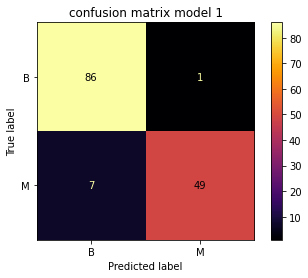

In [ ]:
# Draw confusion matrix for each model


from sklearn.metrics import ConfusionMatrixDisplay

# Model 1
ConfusionMatrixDisplay.from_estimator(rf1,test_df[ml_features].values, test_df['diagnosis'], cmap='inferno',values_format='g')
plt.title("confusion matrix model 1")
plt.show()

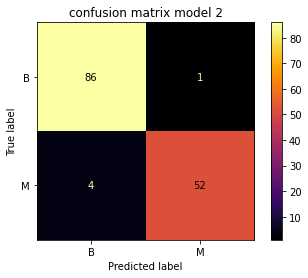

In [ ]:
# Model 2
ConfusionMatrixDisplay.from_estimator(rf2,test_df[ml_features].values, test_df['diagnosis'], cmap='inferno',values_format='g')
plt.title("confusion matrix model 2")
plt.show()

####  Train Gradient boosted tree models


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

gbt =  GradientBoostingClassifier(max_depth=4, 
                                           random_state=2022).fit(train_df[ml_features].values, 
                                                                 train_df['diagnosis'])
print ("score %.2f"%gbt.score(train_df[ml_features].values, train_df['diagnosis']))


score 1.00


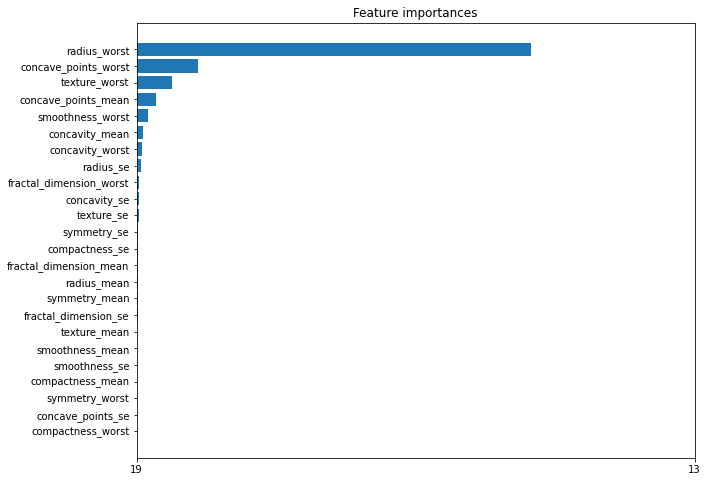

In [ ]:
#there is no standard deviation in gradient boosted tree!

indices = np.argsort(gbt.feature_importances_)
plt.figure(figsize= (10,8))

plt.title("Feature importances")
plt.barh(np.arange(gbt.feature_importances_.shape[0]), 
        gbt.feature_importances_[indices])
plt.xticks(range(gbt.feature_importances_.shape[0]), indices)
plt.yticks(range(gbt.feature_importances_.shape[0]), 
          labels = test_df[ml_features].columns[indices])
plt.xlim(0, 1)
plt.show()

In [ ]:
# predict
predicted_classification_gbt = gbt.predict(test_df[ml_features].values)

In [ ]:
# evaluate the predictions
getresults(test_df['diagnosis'].values,predicted_classification_gbt)

('Precision:',
 0.9607843137254902,
 'Recall: ',
 0.875,
 'Accuracy:',
 0.9370629370629371,
 'F1:',
 0.9158878504672897)

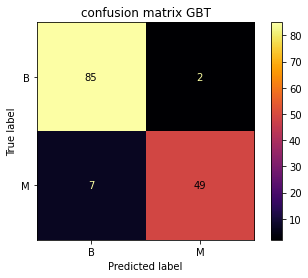

In [ ]:
# Draw a confusion matrix

ConfusionMatrixDisplay.from_estimator(gbt,test_df[ml_features].values, test_df['diagnosis'], cmap='inferno',values_format='g')
plt.title("confusion matrix GBT")
plt.show()

# GridCV: most efficient way to tune hyperparameters

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# determine the classifier and basic parameters of the classifier
rf =  RandomForestClassifier(random_state=2022)

# decide the hyperparameters to be tested
min_samples_split = [2,3,4]                                      
max_depth=[3,4,5,6,8, None]
criterion= ['gini','entropy']
parameters_rf=dict(min_samples_split=min_samples_split,criterion=criterion,max_depth=max_depth)

#training random forest model with combinations of all hyperparameters above using GridSearchCV
# GridSearchCV will find the hyperparameters that will give you the best predictions in cross validation according to the scoring method chosen
gridrf=GridSearchCV(rf,parameters_rf,cv=10, scoring = 'accuracy')
gridrf.fit(train_df[ml_features],train_df['diagnosis'])

In [ ]:
def examinebestmodel(model_name):
    print(model_name.best_score_)
    print(model_name.best_params_)
    print(model_name.best_estimator_)

In [ ]:
examinebestmodel(gridrf)

0.9672203765227021
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 4}
RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_split=4,
                       random_state=2022)


In [ ]:
test_prediction_rf=gridrf.best_estimator_.predict(test_df[ml_features])

getresults(test_df['diagnosis'],test_prediction_rf)

('Precision:',
 0.9807692307692307,
 'Recall: ',
 0.9107142857142857,
 'Accuracy:',
 0.958041958041958,
 'F1:',
 0.9444444444444444)

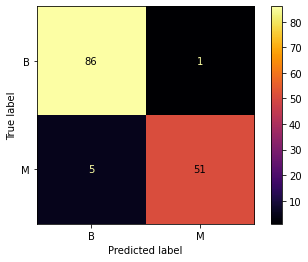

In [ ]:
#confusion matrix for rf

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(gridrf.best_estimator_,test_df[ml_features],test_df['diagnosis'],cmap='inferno',values_format='g')
plt.show()

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gbt =  GradientBoostingClassifier()
loss = ['exponential', 'deviance']                                      
max_depth=[3,4,5,6,8, None]
criterion= ['squared_error','friedman_mse']

parameters_gbt=dict(loss=loss,criterion=criterion,max_depth=max_depth)

#training GBT model, finding best params
gridgbt=GridSearchCV(gbt,parameters_gbt,cv=10, scoring = 'accuracy', error_score='raise')
gridgbt.fit(train_df[ml_features],train_df['diagnosis'])

In [ ]:
examinebestmodel(gridgbt)

0.9578073089700997
{'criterion': 'squared_error', 'loss': 'deviance', 'max_depth': 4}
GradientBoostingClassifier(criterion='squared_error', max_depth=4)


In [ ]:
test_prediction_gbt=gridgbt.best_estimator_.predict(test_df[ml_features])


In [ ]:
getresults(test_df['diagnosis'],test_prediction_gbt)

('Precision:',
 0.9433962264150944,
 'Recall: ',
 0.8928571428571429,
 'Accuracy:',
 0.9370629370629371,
 'F1:',
 0.9174311926605505)

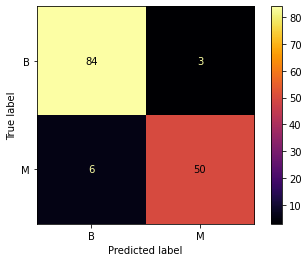

In [ ]:
#confusion matrix for gbt
ConfusionMatrixDisplay.from_estimator(gridgbt.best_estimator_,test_df[ml_features],test_df['diagnosis'],cmap='inferno',values_format='g')
plt.show()

# K-NN classifier

In this example, we will use GridSearchCV to find the best hyperparameters for the model

In [ ]:
breast[features]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Divide train/test and scale 

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(breast, test_size=0.25, random_state=2022)


scaler = preprocessing.StandardScaler()
train_df[features]=scaler.fit_transform(train_df[features])
test_df[features]=scaler.fit_transform(test_df[features])


#### Use GridSearchCV to find optimal hyperparameters for the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

knn = KNeighborsClassifier()
neighbors=[3,5,9,13]
metric=['manhattan','euclidean', 'chebyshev']
algorithm=['ball_tree', 'brute','auto', 'kd_tree']
parameters_knn=dict(n_neighbors=neighbors,metric=metric,algorithm=algorithm)


#training KNN model, finding best params
gridknn=GridSearchCV(knn,parameters_knn,cv=10,verbose=1, scoring = 'accuracy')
gridknn.fit(train_df[features],train_df['diagnosis'])

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'brute', 'auto', 'kd_tree'],
                         'metric': ['manhattan', 'euclidean', 'chebyshev'],
                         'n_neighbors': [3, 5, 9, 13]},
             scoring='accuracy', verbose=1)

In [ ]:
examinebestmodel(gridknn)

0.9764673311184939
{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 3}
KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=3)


#### Predict malignant/benign on test set with the optimal hyperparameters

In [ ]:
#predicting on test set
test_prediction_knn=gridknn.best_estimator_.predict(test_df[features])
getresults(test_df['diagnosis'],test_prediction_knn)

('Precision:',
 1.0,
 'Recall: ',
 0.9285714285714286,
 'Accuracy:',
 0.972027972027972,
 'F1:',
 0.962962962962963)

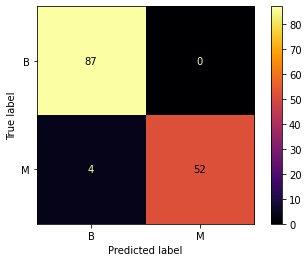

In [ ]:


#confusion matrix for KNN 
ConfusionMatrixDisplay.from_estimator(gridknn.best_estimator_,test_df[features],test_df['diagnosis'],cmap='inferno',values_format='g')
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

svm_model= SVC()
parameters_SVC = {
 'C': [1, 10,100], 'kernel': ['linear','rbf','sigmoid', 'poly'], 
 'gamma': [1,0.01, 0.0001]}


# C is the regularization parameter:
#  large C will find a hyperplane with smaller margins (= more segmentations, therefore better fit)

# gamma is how far the influence of a single training example reaches
# high gamma: points close to plausible line are considered in calculation
# low gamma: points far away from plausible seperation line are considered in calculation for the separation line

model_svm = GridSearchCV(svm_model, parameters_SVC,cv=10, scoring = 'accuracy')
model_svm.fit(train_df[features],train_df['diagnosis'])



GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.01, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             scoring='accuracy')

In [ ]:
examinebestmodel(model_svm)

0.974141749723145
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [ ]:
#predicting on test set
test_prediction_svm=model_svm.best_estimator_.predict(test_df[features])
getresults(test_df['diagnosis'],test_prediction_svm)

('Precision:',
 1.0,
 'Recall: ',
 0.8928571428571429,
 'Accuracy:',
 0.958041958041958,
 'F1:',
 0.9433962264150945)

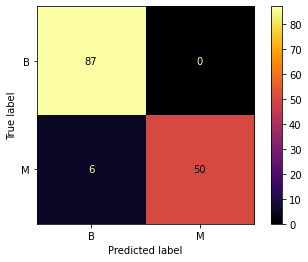

In [ ]:
#confusion matrix for svm
ConfusionMatrixDisplay.from_estimator(model_svm.best_estimator_,test_df[features],test_df['diagnosis'],cmap='inferno',values_format='g')
plt.show()